# Your first convolutional neural network

# imports

In [31]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

# data

In [32]:
NUM_CLASSES = 10

In [33]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [34]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [35]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [36]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [37]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_5 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [38]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.3)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [39]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 16, 16, 32)        0   

# train

In [40]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [41]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 64s 1ms/step - loss: 1.4774 - accuracy: 0.4787 - val_loss: 1.2158 - val_accuracy: 0.5545
Epoch 2/10
50000/50000 [==============================] - 63s 1ms/step - loss: 1.1130 - accuracy: 0.6066 - val_loss: 1.1073 - val_accuracy: 0.6098
Epoch 3/10
50000/50000 [==============================] - 63s 1ms/step - loss: 0.9520 - accuracy: 0.6669 - val_loss: 0.8906 - val_accuracy: 0.6940
Epoch 4/10
50000/50000 [==============================] - 63s 1ms/step - loss: 0.8609 - accuracy: 0.7005 - val_loss: 1.0011 - val_accuracy: 0.6540
Epoch 5/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.7875 - accuracy: 0.7271 - val_loss: 0.8784 - val_accuracy: 0.6913
Epoch 6/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.7309 - accuracy: 0.7436 - val_loss: 0.9531 - val_accuracy: 0.6787
Epoch 7/10
50000/50000 [==============================] - 64s 1ms/st

In [42]:
model.layers[6].get_weights()

[]

# analysis

In [43]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 3s 330us/step


[0.8914383828639985, 0.7044000029563904]

In [44]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

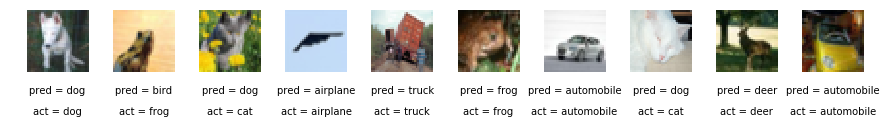

In [19]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
